<a href="https://colab.research.google.com/github/JumanaRahim/TSA/blob/main/Assignment%202/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
series = read_csv('/content/daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
pyplot.show()

            Temp
Date            
01-01-1981  20.7
02-01-1981  17.9
03-01-1981  18.8
04-01-1981  14.6
05-01-1981  15.8


In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
series2=pd.read_csv('/content/daily-min-temperatures.csv',index_col='Date',squeeze=True)
X=series2.values
result=adfuller(X)
series2

Date
01-01-1981    20.7
02-01-1981    17.9
03-01-1981    18.8
04-01-1981    14.6
05-01-1981    15.8
              ... 
27-12-1990    14.0
28-12-1990    13.6
29-12-1990    13.5
30-12-1990    15.7
31-12-1990    13.0
Name: Temp, Length: 3650, dtype: float64

In [20]:
result

(-4.444804924611696,
 0.0002470826300361034,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '10%': -2.56719413172842,
  '5%': -2.862336767636517},
 16642.822304301197)

In [21]:
series

,Temp
Date,
01-01-1981,20.7
02-01-1981,17.9
03-01-1981,18.8
04-01-1981,14.6
05-01-1981,15.8
...,...
27-12-1990,14.0
28-12-1990,13.6
29-12-1990,13.5


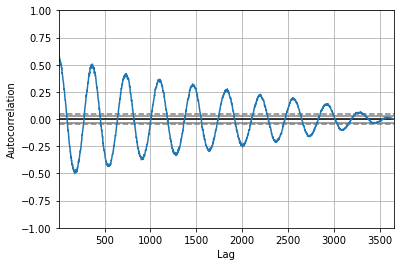

In [22]:
#Check for Autocorrelation
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

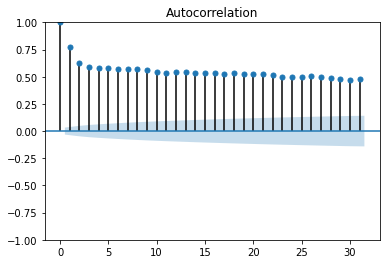

In [23]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
plot_acf(series, lags=31)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


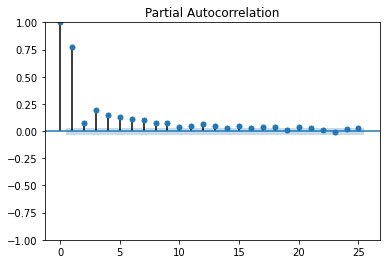

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=25)
pyplot.show()

In [25]:
X=series.values

In [26]:
X

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [27]:
# Splitting the data into training and test data sets
train =series['Temp'].iloc[:-5]
test =series['Temp'].iloc[-5:]
train

Date
01-01-1981    20.7
02-01-1981    17.9
03-01-1981    18.8
04-01-1981    14.6
05-01-1981    15.8
              ... 
22-12-1990    13.2
23-12-1990    13.9
24-12-1990    10.0
25-12-1990    12.9
26-12-1990    14.6
Name: Temp, Length: 3645, dtype: float64

In [28]:
test


Date
27-12-1990    14.0
28-12-1990    13.6
29-12-1990    13.5
30-12-1990    15.7
31-12-1990    13.0
Name: Temp, dtype: float64

In [29]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train,lags=22).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3645
Model:                    AutoReg(22)   Log Likelihood               -8306.707
Method:               Conditional MLE   S.D. of innovations              2.396
Date:                Tue, 28 Jun 2022   AIC                          16661.414
Time:                        08:08:35   BIC                          16810.096
Sample:                            22   HQIC                         16714.384
                                 3645                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6005      0.146      4.103      0.000       0.314       0.887
Temp.L1        0.5902      0.017     35.563      0.000       0.558       0.623
Temp.L2       -0.0916      0.019     -4.753      0.0

In [35]:
forecasts = model.forecast(5).tolist()
test_values =test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

14.454713753476343 14.0 0.4547137534763426
13.79523914849815 13.6 0.19523914849814972
13.439249978365861 13.5 -0.06075002163413856
13.323261111336475 15.7 -2.3767388886635246
13.111045598879578 13.0 0.11104559887957777


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [36]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

1.181958471550285


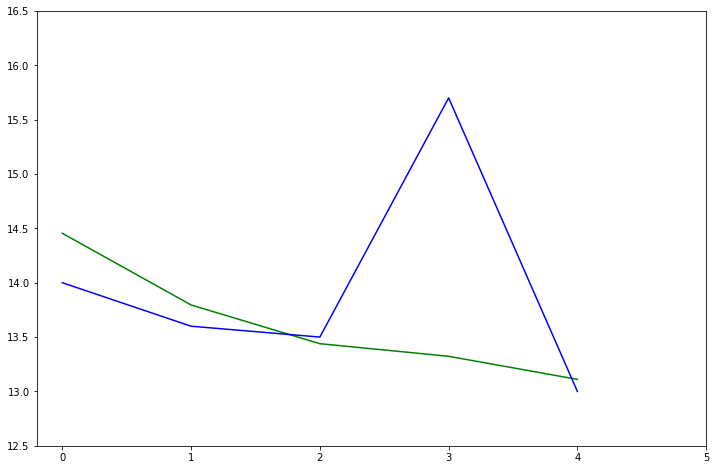

In [39]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="green")
plt.plot(test_values,color="blue")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()